<a href="https://colab.research.google.com/github/rabiyatahseen/ML-workshop/blob/main/ML_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA | Exploratory Data Analysis

#Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Reading Dataset

In [13]:
df = pd.read_csv("/content/Depression Student Dataset.csv")
print(df.head())

   Gender  Age  Academic Pressure  Study Satisfaction     Sleep Duration  \
0    Male   28                2.0                 4.0          7-8 hours   
1    Male   28                4.0                 5.0          5-6 hours   
2    Male   25                1.0                 3.0          5-6 hours   
3    Male   23                1.0                 4.0  More than 8 hours   
4  Female   31                1.0                 5.0  More than 8 hours   

  Dietary Habits Have you ever had suicidal thoughts ?  Study Hours  \
0       Moderate                                   Yes            9   
1        Healthy                                   Yes            7   
2      Unhealthy                                   Yes           10   
3      Unhealthy                                   Yes            7   
4        Healthy                                   Yes            4   

   Financial Stress Family History of Mental Illness Depression  
0                 2                              Y

#Analyzing the Data

In [14]:
df.shape

(502, 11)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 502 non-null    object 
 1   Age                                    502 non-null    int64  
 2   Academic Pressure                      502 non-null    float64
 3   Study Satisfaction                     502 non-null    float64
 4   Sleep Duration                         502 non-null    object 
 5   Dietary Habits                         502 non-null    object 
 6   Have you ever had suicidal thoughts ?  502 non-null    object 
 7   Study Hours                            502 non-null    int64  
 8   Financial Stress                       502 non-null    int64  
 9   Family History of Mental Illness       502 non-null    object 
 10  Depression                             502 non-null    object 
dtypes: flo

In [16]:
df.describe()

,Age,Academic Pressure,Study Satisfaction,Study Hours,Financial Stress
count,502.000000,502.000000,502.000000,502.000000,502.000000
mean,26.241036,3.003984,3.075697,6.404382,2.928287
std,4.896501,1.390007,1.373490,3.742434,1.425053
min,18.000000,1.000000,1.000000,0.000000,1.000000
25%,22.000000,2.000000,2.000000,3.000000,2.000000
50%,26.500000,3.000000,3.000000,7.000000,3.000000
75%,30.000000,4.000000,4.000000,10.000000,4.000000
max,34.000000,5.000000,5.000000,12.000000,5.000000


In [17]:
df.columns.tolist()

['Gender',
 'Age',
 'Academic Pressure',
 'Study Satisfaction',
 'Sleep Duration',
 'Dietary Habits',
 'Have you ever had suicidal thoughts ?',
 'Study Hours',
 'Financial Stress',
 'Family History of Mental Illness',
 'Depression']

In [18]:
df.isnull().sum()

,0
Gender,0
Age,0
Academic Pressure,0
Study Satisfaction,0
Sleep Duration,0
Dietary Habits,0
Have you ever had suicidal thoughts ?,0
Study Hours,0
Financial Stress,0
Family History of Mental Illness,0


Checking for the duplicate values

In [19]:
df.nunique()

,0
Gender,2
Age,17
Academic Pressure,5
Study Satisfaction,5
Sleep Duration,4
Dietary Habits,3
Have you ever had suicidal thoughts ?,2
Study Hours,13
Financial Stress,5
Family History of Mental Illness,2


#** Different Plots**

#Count Plot

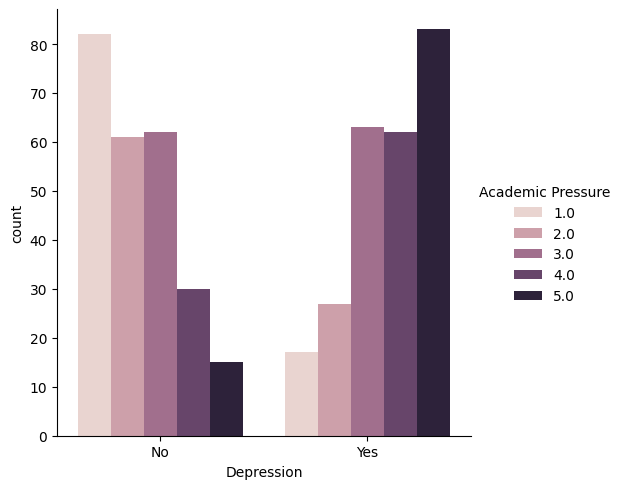

In [27]:
Depression_Student_Dataset = pd.read_csv("/content/Depression Student Dataset.csv")
sns.catplot(x="Depression", hue="Academic Pressure", kind="count", data=Depression_Student_Dataset)
plt.show()

#Heat Map

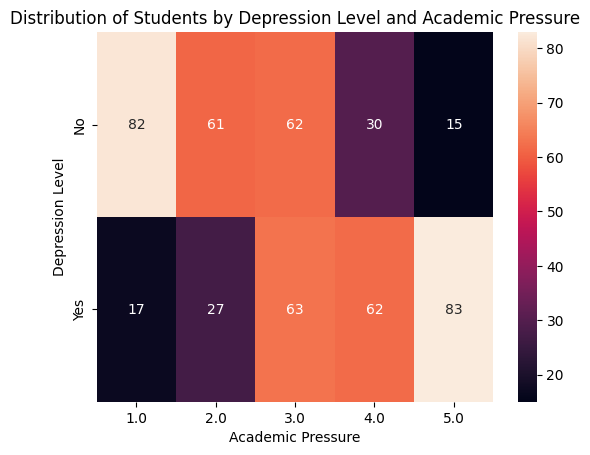

In [28]:
group = Depression_Student_Dataset.groupby(['Depression', 'Academic Pressure'])
pclass_survived = group.size().unstack()
sns.heatmap(pclass_survived, annot=True, fmt="d")
plt.xlabel("Academic Pressure")
plt.ylabel("Depression Level")
plt.title("Distribution of Students by Depression Level and Academic Pressure")
plt.show()

#Violin Plot

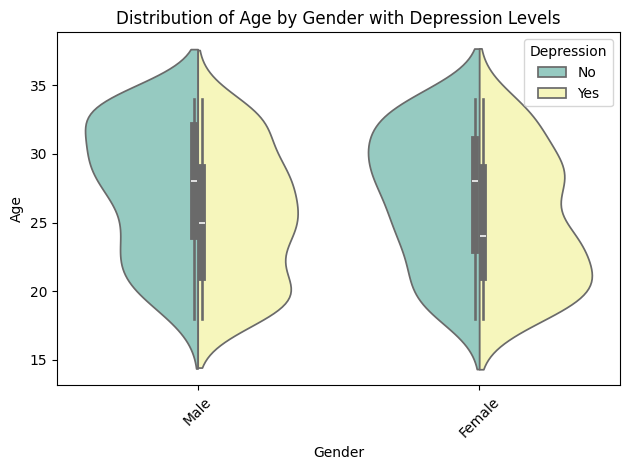

In [29]:
x_col = "Gender"
y_col = "Age"
hue_col = "Depression"
sns.violinplot(
    x=x_col,
    y=y_col,
    hue=hue_col,
    split=True,
    data=df,
    palette="Set3",
)
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title(f"Distribution of {y_col} by {x_col} with {hue_col} Levels")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Bar Plot

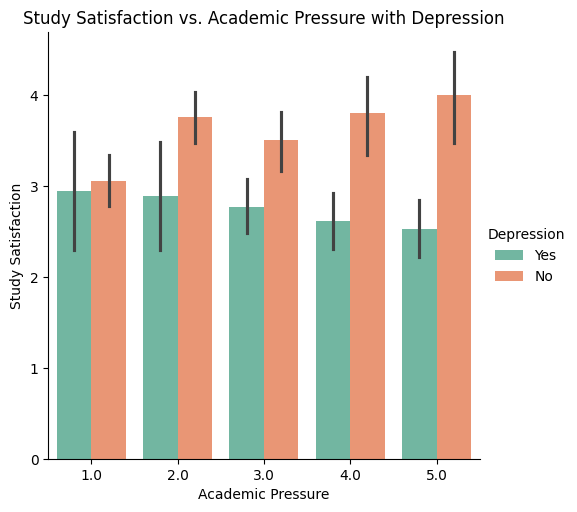

In [48]:
sns.catplot(x='Academic Pressure', y='Study Satisfaction', hue='Depression', kind="bar", data=df , palette="Set2")
plt.title("Study Satisfaction vs. Academic Pressure with Depression")
plt.show()

#Box Plot

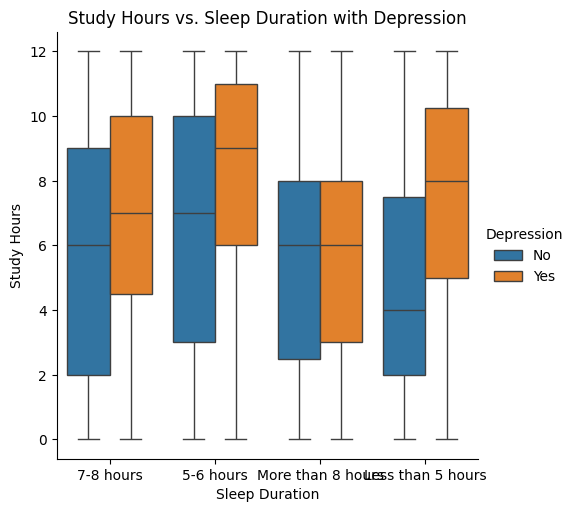

In [44]:
sns.catplot(x='Sleep Duration', y='Study Hours', hue='Depression', kind="box", data=df)
plt.title("Study Hours vs. Sleep Duration with Depression")
plt.show()

#Bar Plot

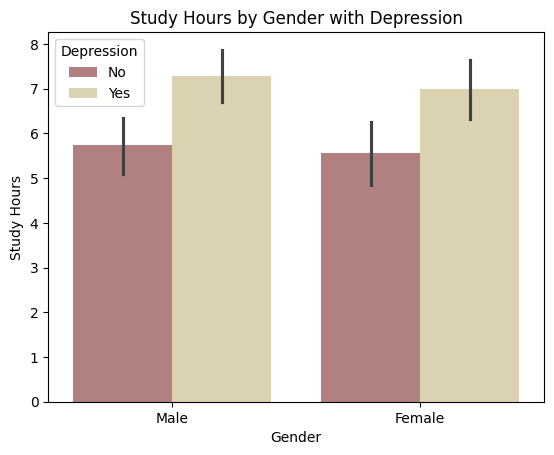

In [41]:
sns.barplot(x='Gender', y='Study Hours', hue='Depression', data=df, palette='pink')
plt.title("Study Hours by Gender with Depression")
plt.xlabel("Gender")
plt.ylabel("Study Hours")
plt.legend(title='Depression')
plt.show()

#Line Plot

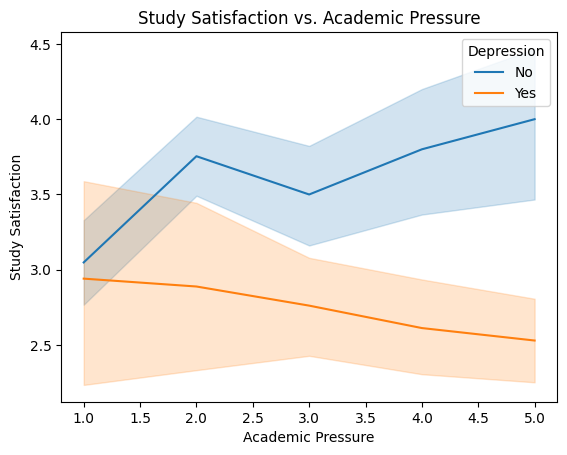

In [50]:
sns.lineplot(x='Academic Pressure', y='Study Satisfaction', hue='Depression', data=df)
plt.title("Study Satisfaction vs. Academic Pressure")
plt.xlabel("Academic Pressure")
plt.ylabel("Study Satisfaction")
plt.show()

#Correlation Matrix for Student Depression Dataset

In [59]:
numerical_columns = ['Age','Academic Pressure','Study Satisfaction','Study Hours','Financial Stress']
df_numerical = df[numerical_columns]
correlation_matrix = df_numerical.corr()
print(correlation_matrix)

                         Age  Academic Pressure  Study Satisfaction  \
Age                 1.000000           0.027132           -0.005093   
Academic Pressure   0.027132           1.000000           -0.101571   
Study Satisfaction -0.005093          -0.101571            1.000000   
Study Hours         0.050112           0.053024           -0.014122   
Financial Stress   -0.095348           0.003168           -0.038012   

                    Study Hours  Financial Stress  
Age                    0.050112         -0.095348  
Academic Pressure      0.053024          0.003168  
Study Satisfaction    -0.014122         -0.038012  
Study Hours            1.000000          0.015554  
Financial Stress       0.015554          1.000000  
